<a href="https://colab.research.google.com/github/thatsmygirl/AI-project/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 20

In [3]:
base_dir = "../content/drive/MyDrive/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")
!rmdir /content/drive/My Drive/DeepCID/model_cnn/.ipynb_checkpoints

rmdir: failed to remove '/content/drive/My': No such file or directory
rmdir: failed to remove 'Drive/DeepCID/model_cnn/.ipynb_checkpoints': No such file or directory


In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [5]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [6]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9}


In [7]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/content/class_indices.json

In [8]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [9]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories), 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="PlantDiseases")

In [10]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

In [11]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=100,
                    validation_steps=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 2083s 21s/step - loss: 0.9687 - categorical_accuracy: 0.6947 - accuracy: 0.6947 - val_loss: 0.2972 - val_categorical_accuracy: 0.9312 - val_accuracy: 0.9312
Epoch 2/20
100/100 [==============================] - 1600s 16s/step - loss: 0.2816 - categorical_accuracy: 0.9212 - accuracy: 0.9212 - val_loss: 0.1520 - val_categorical_accuracy: 0.9688 - val_accuracy: 0.9688
Epoch 3/20
100/100 [==============================] - 1207s 12s/step - loss: 0.1840 - categorical_accuracy: 0.9531 - accuracy: 0.9531 - val_loss: 0.1155 - val_categorical_accuracy: 0.9712 - val_accuracy: 0.9712
Epoch 4/20
100/100 [==============================] - 977s 10s/step - loss: 0.1391 - categorical_accuracy: 0.9628 - accuracy: 0.9628 - val_loss: 0.0942 - val_categorical_accuracy: 0.9750 - val_accuracy: 0.9750
Epoch 5/20
100/100 [==============================] - 754s 8s/step - loss: 0.1304 - categorical_accuracy: 0.9635 - accuracy: 0.9635 - val_loss: 0.0754 - val_categorical

In [19]:
scores = model.evaluate(test_data, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 1s 106ms/step - loss: 0.0273 - categorical_accuracy: 0.9937 - accuracy: 0.9937
categorical_accuracy: 99.37%


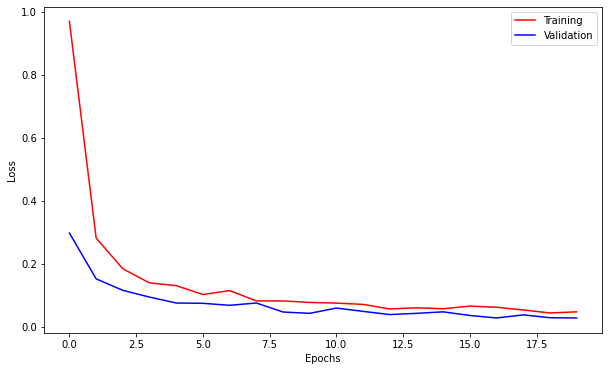

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

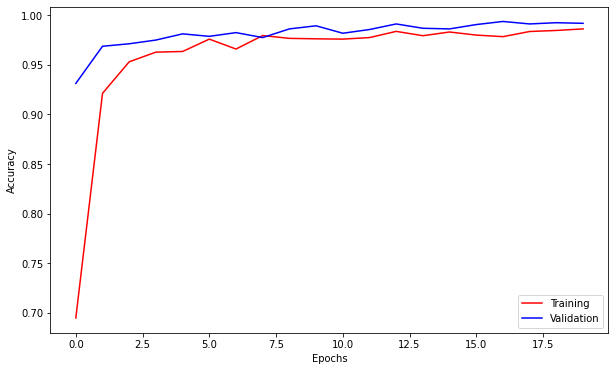

In [13]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()